In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.insert(0, "/notebooks/")
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [4]:
PATH = "/notebooks/data/fruits/"
sz=224

In [5]:
files = os.listdir(f'{PATH}valid/Apple Golden 1')[:5]

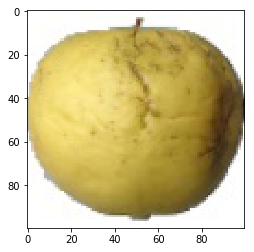

In [6]:
img = plt.imread(f'{PATH}valid/Apple Golden 1/{files[0]}')
plt.imshow(img);

In [7]:
img.shape

(100, 100, 3)

In [10]:
STATS = A([0.70, 0.58, 0.49], [0.02, 0.02, 0.01])

In [11]:
SZ = 224

In [12]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_stats(STATS, SZ, aug_tfms=transforms_side_on, crop_type=CropType.CENTER))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 37152075.46it/s]


100%|██████████| 217/217 [00:22<00:00,  9.60it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.2252     0.212705   0.94617   
    1      0.12357    0.142444   0.954529  



[array([0.14244]), 0.9545290768898177]

In [13]:
lrf=learn.lr_find()

 69%|██████▊   | 443/646 [00:04<00:02, 89.00it/s, loss=0.219]


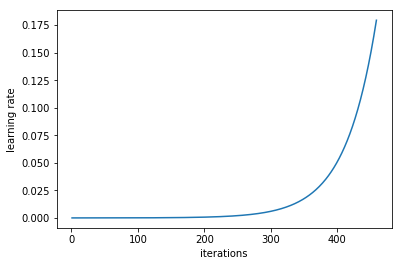

In [14]:
learn.sched.plot_lr()

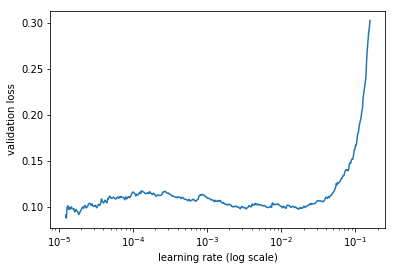

In [15]:
learn.sched.plot()

In [16]:
tfms=tfms_from_stats(STATS, SZ, aug_tfms=transforms_side_on, crop_type=CropType.CENTER, max_zoom=1.1)

In [17]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [18]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.232713   0.213265   0.94163   



[array([0.21326]), 0.9416300353102256]

In [19]:
learn.fit(1e-2, 2)

epoch      trn_loss   val_loss   accuracy   
    0      0.110726   0.136873   0.956547  
    1      0.076623   0.112316   0.962888  



[array([0.11232]), 0.9628882323268718]

In [20]:
learn.precompute=False

In [21]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.348552   0.148155   0.953953  
    1      0.251634   0.132989   0.954529  
    2      0.224961   0.120983   0.956619  



[array([0.12098]), 0.9566188657490812]

In [22]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.195715   0.125909   0.95525   
    1      0.176324   0.110111   0.960294  
    2      0.171526   0.104372   0.963393  



[array([0.10437]), 0.9633926641204872]

In [23]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.153348   0.103268   0.96224   
    1      0.151259   0.097239   0.968581  
    2      0.134523   0.088797   0.968941  
    3      0.146481   0.118237   0.959934  
    4      0.128005   0.097028   0.963465  
    5      0.112604   0.089774   0.966924  
    6      0.112997   0.090855   0.966563  



[array([0.09085]), 0.9665633782517835]

In [24]:
learn.fit(1e-2, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.117071   0.086812   0.966996  
    1      0.1137     0.092599   0.96505   
    2      0.10716    0.084004   0.969374  



[array([0.084]), 0.9693737839590689]

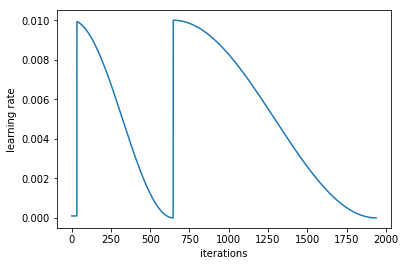

In [25]:
learn.sched.plot_lr()

In [26]:
learn.save('v2_224_lastlayer')

In [27]:
learn.load('v2_224_lastlayer')

In [28]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.102536   0.084218   0.969086  
    1      0.096234   0.08576    0.968869  
    2      0.095364   0.084709   0.968725  
    3      0.096938   0.087476   0.971968  
    4      0.087763   0.08081    0.970311  
    5      0.089637   0.072709   0.97204   
    6      0.086238   0.073052   0.971175  



[array([0.07305]), 0.9711753260791237]

In [29]:
learn.save('v2_224_lastlayer2')

In [30]:
learn.load('v2_224_lastlayer2')

In [31]:
learn.unfreeze()

In [32]:
lr=np.array([1e-4,1e-3,1e-2])

In [33]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.059246   0.03926    0.986524  
    1      0.025484   0.03051    0.989551  
    2      0.020179   0.027401   0.987966  
    3      0.017936   0.02336    0.988975  
    4      0.015983   0.020903   0.989263  
    5      0.014831   0.020143   0.989551  
    6      0.014312   0.020504   0.989551  



[array([0.0205]), 0.9895510557036824]

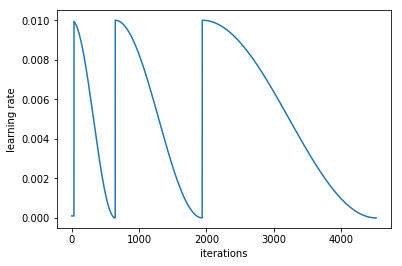

In [34]:
learn.sched.plot_lr()

In [35]:
learn.save('fruits_v2_all_gpu')

In [36]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.013153   0.022662   0.989191  
    1      0.013496   0.024482   0.989047  
    2      0.015474   0.024368   0.989191  
    3      0.013865   0.021831   0.989911  
    4      0.011497   0.023348   0.989479  
    5      0.011746   0.02519    0.988975  
    6      0.011036   0.023916   0.989695  



[array([0.02392]), 0.9896951790732867]

In [37]:
learn.save('fruits_v2_all_gpu')

In [40]:
learn.model.cpu()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [41]:
learn.save('fruits_v2_cpu')

In [42]:
learn.load('fruits_v2_cpu')

In [44]:
learn.model.cuda()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [45]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [46]:
accuracy_np(probs, y)

0.9911364127693305